<a href="https://colab.research.google.com/github/Ovizero01/Python-for-ML/blob/main/016_5_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
rng = np.random.default_rng(42)

def generate_students(n=200, seed=42):
 	rng = np.random.default_rng(seed)
 	hours_studied = rng.normal(5, 2, n).clip(1, 10)
 	marks = (hours_studied * rng.uniform(8, 12, n) + rng.normal(0, 5, n)).clip(30, 100)
 	gender = rng.choice(['Male', 'Female'], n)
 	subject = rng.choice(['Math', 'Science', 'English', 'History'], n)
 	study_method = rng.choice(['Solo', 'Group'], n, p=[0.6, 0.4])
 	attempts = rng.integers(1, 4, n)
 	return pd.DataFrame({
     	'hours_studied': hours_studied.round(2),
     	'marks': marks.round(2),
     	'gender': gender,
     	'subject': subject,
     	'study_method': study_method,
     	'attempts': attempts
 	})

def generate_daily_sales(n=60, seed=42):
 	rng = np.random.default_rng(seed)
 	base = pd.date_range(start='2024-01-01', periods=n, freq='D')
 	trend = np.linspace(50, 80, n)
 	season = 8 * np.sin(np.linspace(0, 3*np.pi, n))
 	noise = rng.normal(0, 3, n)
 	sales = (trend + season + noise).round(2)
 	return pd.DataFrame({'date': base, 'sales': sales})

# Example usage
# students = generate_students(220)
# sales = generate_daily_sales(90)


In [2]:
students = generate_students(220)
sales = generate_daily_sales(90)

# Using sales, draw a lineplot of date vs sales.


<Axes: xlabel='date', ylabel='sales'>

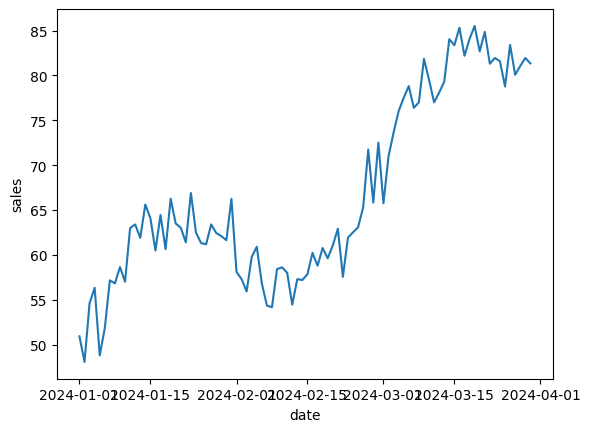

In [8]:
sns.lineplot(data = sales, x = 'date', y = 'sales')

# From students, plot hours_studied vs marks and color by gender.


<Axes: xlabel='hours_studied', ylabel='marks'>

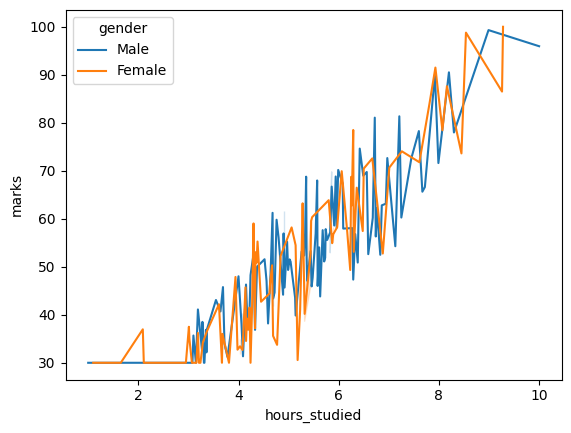

In [13]:
sns.lineplot(data = students, x = 'hours_studied', y = 'marks', hue = 'gender')

# Create a grid of scatterplots (hours_studied vs marks) faceted by subject.


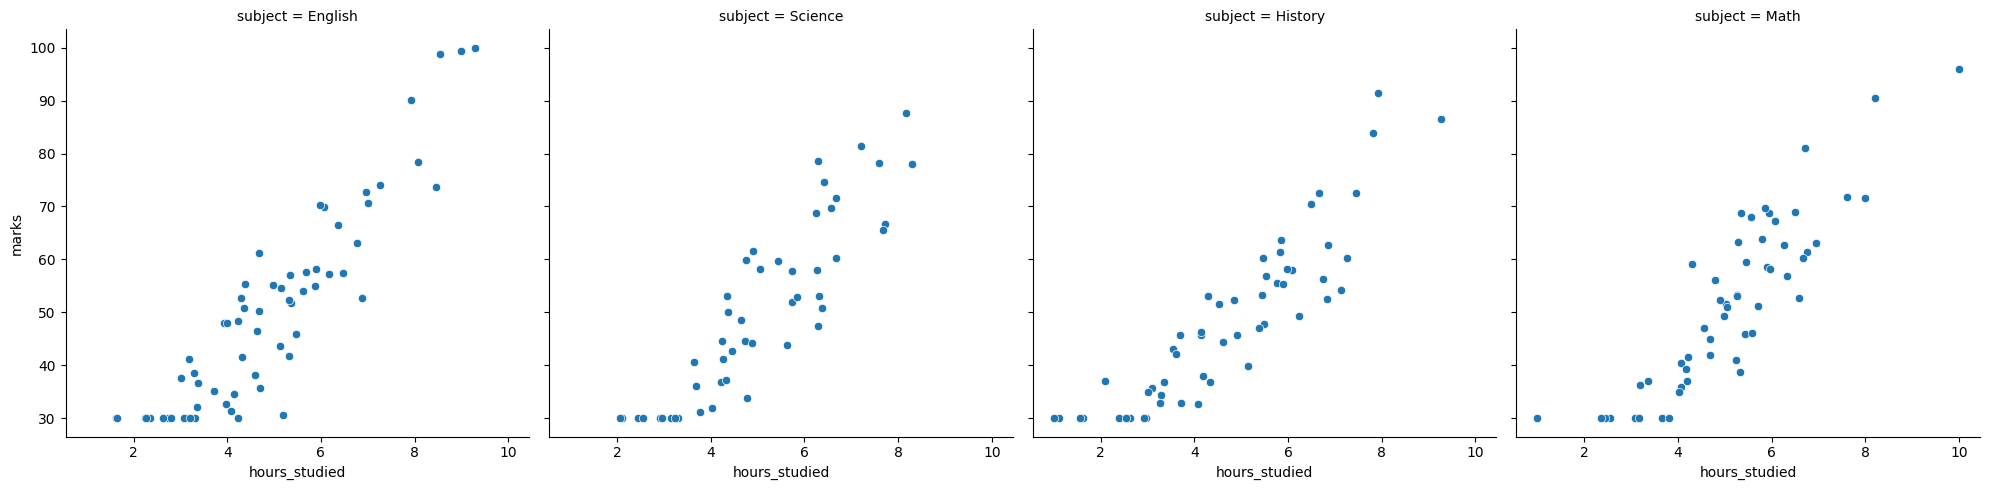

In [22]:
sns.relplot(kind = 'scatter', data = students, x = 'hours_studied', y = 'marks', col = 'subject')

# Plot a histogram of marks with a KDE overlay.


<Axes: xlabel='marks', ylabel='Count'>

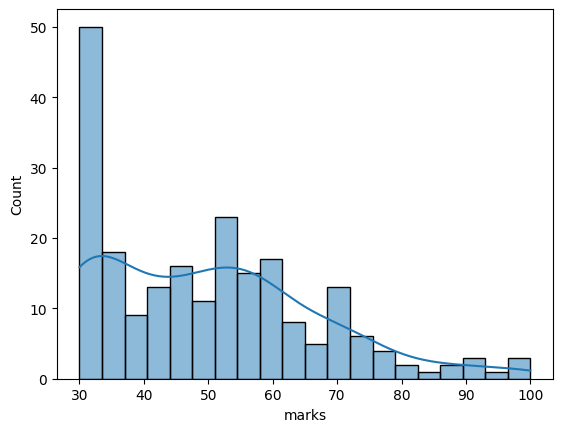

In [28]:
sns.histplot(data = students, x = 'marks', kde = True, bins = 20)

# Show the KDE curve for hours_studied

<Axes: xlabel='hours_studied', ylabel='Density'>

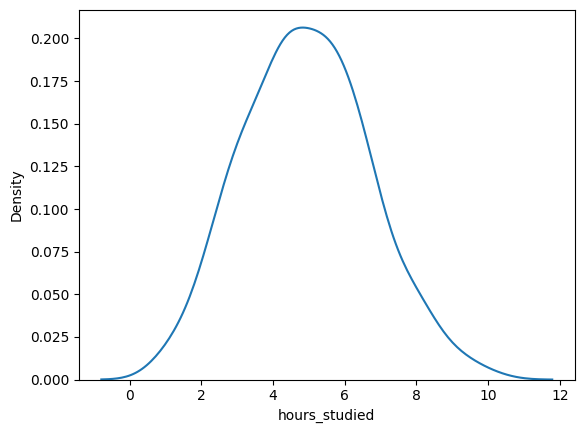

In [29]:
sns.kdeplot(data = students, x = 'hours_studied')

# Display the count of records per subject


<Axes: xlabel='subject', ylabel='count'>

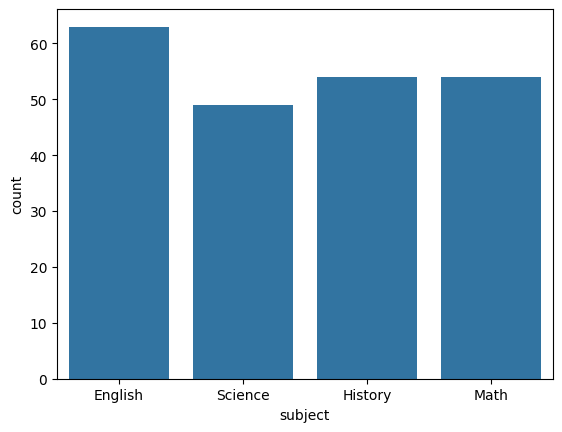

In [30]:
sns.countplot(data = students, x = 'subject')

# Draw a regression line for hours_studied and marks


<Axes: xlabel='hours_studied', ylabel='marks'>

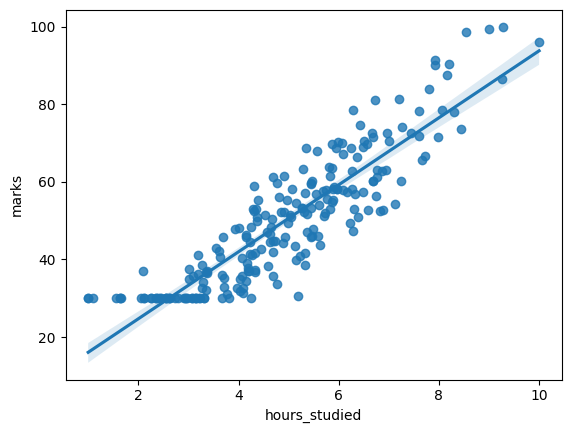

In [31]:
sns.regplot(data = students, x = 'hours_studied', y = 'marks')

# Create a pairplot and a jointplot for students' dataset


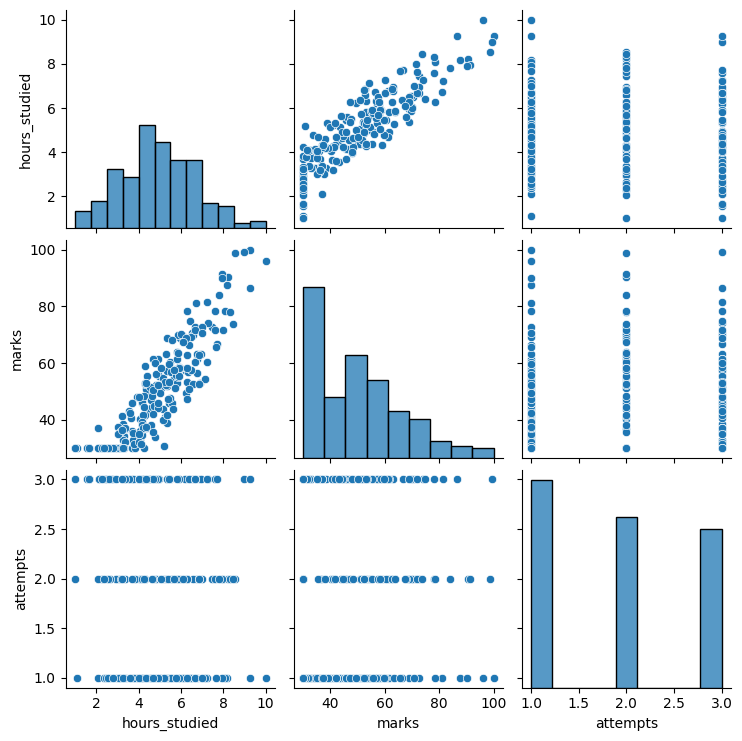

In [32]:
sns.pairplot(data = students)

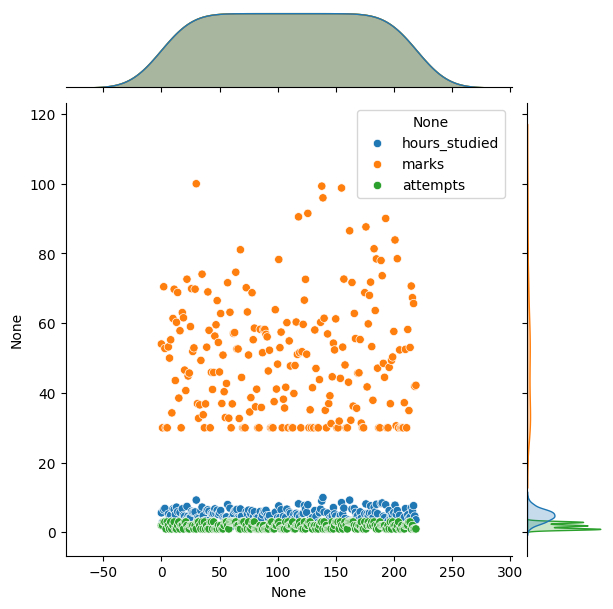

In [33]:
sns.jointplot(data = students)

# Make a scatter plot of hours_studied vs marks using Plotly, colored by gender


In [35]:
fig = px.scatter(students, x = 'hours_studied', y = 'marks', color = 'gender')
fig.show()

# Draw a line chart of sales over date and a histogram of marks using Plotly.


In [37]:
fig = px.line(sales, x = 'sales', y = 'date')
fig.show()

In [42]:
fig = px.histogram(students, x = 'marks')
fig.show()